# <center>Neutrino-Driven Wind Transsonic Velocity Solver</center>
This code is designed to approximate the critical transsonic velocity of the neutrino-driven wind from the surface of a proto-neutron star, where the wind follows a gamma law equation of state. This is accomplished by evolving a set of ODEs until a sign change occurs in one of two characteristic functions of the system. The critical velocity is found by adjusting the starting velocity of the wind so that the two functions cross zero at the same time using a bisection method. 

In [1]:
%matplotlib inline

The difference in the zeros of these functions is easy to see in the isothermal case (gamma = 1). The curves that approach zero at large r represent "breeze" solutions, where material is lifted off the surface of the star but does not have sufficient energy to escape, and falls back to the surface. The curves that bend upward are nonphysical. The behavior of the curves is determined by which function crosses zero first. 

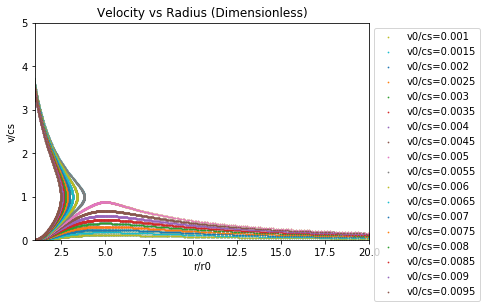

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
s=aws.solver(1,10)
s.makePlots(.001,.01,.0005,False,20,5);

There exists a solution between these two curve sets for which the two functions cross zero at the same time. We use a bisection method to determine the bounds on the critical velocity for this to take place, as shown below.

Lower bound on v0:  0.0050753133773803714
Upper bound on v0:  0.005075325393676755
Estimated v0:  0.005075319385528563
Estimated error:  6.008148191634366e-09


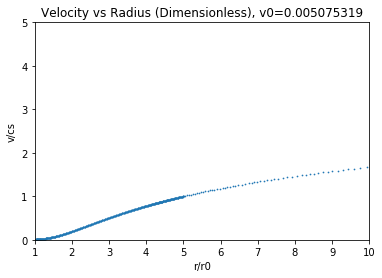

In [8]:
v0avg=s.findV0(.001,.006,.0001)
s.makePlot(v0avg)

This solution does not return to zero, and represents a true wind solution where the material blown off continues out into space.

We can also determine the critical velocity for an isentropic wind that follows an ideal gas equation of state (gamma=5/3). It is harder to see the different solution sets, but the bisection method is just as effective for finding the critical velocity.

Lower bound on v0:  0.0024934089660644527
Upper bound on v0:  0.0025187793731689433
Estimated v0:  0.002506094169616698
Estimated error:  1.2685203552245282e-05


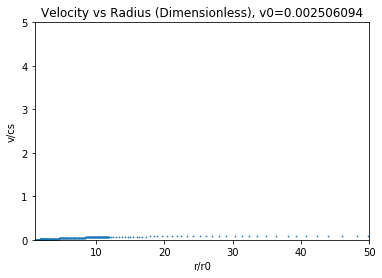

In [20]:
s1=aws.solver(5/3,.1)
v0=s1.findV0(.0001,.009,.0001)
s1.makePlot(v0,xrange=50)

We can also see how the critical velocity depends on the value of gamma, for a general gamma law equation of state. The gammaSearch function simply iterates through given range of gamma values, finds the critical velocity, and plots those velocities. The system seems to destabilize just below gamma=1.5, as the critical velocity drops dramatically to zero.

Searching gamma = 1.48000000000017
No sign change, decrementing bounds
Max iteration count exceeded at gamma = 1.48000000000017
No sign change above v0/cs = 1.925929944387236e-36


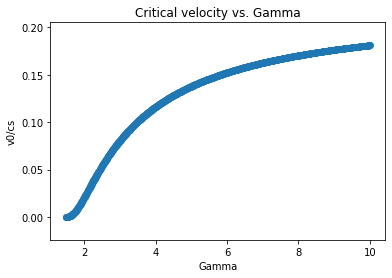

In [12]:
g=s1.gammaSearch(a=.1,g0=10,dg=-.01,glim=1,lower=.01,upper=.9,itermax=100)